# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 8/31/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 8/31/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,566,38928341,1.5
Albania,1859,2877800,64.6
Algeria,5050,43851043,11.5
Andorra,171,77265,221.3
Angola,688,32866268,2.1
Antigua and Barbuda,1,97928,1.0
Argentina,111769,45195777,247.3
Armenia,1935,2963234,65.3
Australia,1830,25459700,7.2


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Peru,105673,32971846,320.5
Maldives,1725,540542,319.1
Bahrain,4391,1701583,258.1
Colombia,125972,50882884,247.6
Argentina,111769,45195777,247.3
Panama,10192,4314768,236.2
Brazil,500918,212559409,235.7
Israel,20187,8655541,233.2
Costa Rica,11644,5094114,228.6


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

8/27/20    240571.0
8/28/20    242126.0
8/29/20    242835.0
8/30/20    243305.0
8/31/20    244802.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

8/18/20       NaN
8/19/20    1586.0
8/20/20    1586.0
8/21/20    1737.0
8/22/20     832.0
8/23/20     633.0
8/24/20    1628.0
8/25/20    1461.0
8/26/20    1427.0
8/27/20    1561.0
8/28/20    1555.0
8/29/20     709.0
8/30/20     470.0
8/31/20    1497.0
Name: Germany, dtype: float64

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


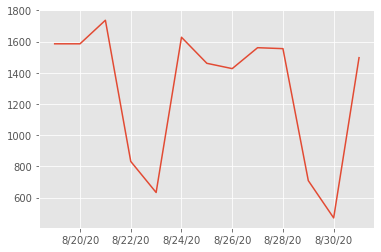

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

19.91073588143886